##gy

#Code

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 5s 18ms/step - loss: 0.6930 - accuracy: 0.0012 - val_loss: 0.6929 - val_accuracy: 0.0012
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6928 - accuracy: 0.0012 - val_loss: 0.6927 - val_accuracy: 0.0012
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6927 - accuracy: 0.0012 - val_loss: 0.6926 - val_accuracy: 0.0013
Epoch 4/50
235/235 [==============================] - 4s 19ms/step - loss: 0.6925 - accuracy: 0.0012 - val_loss: 0.6924 - val_accuracy: 0.0013
Epoch 5/50
235/235 [==============================] - 4s 19ms/step - loss: 0.6924 - accuracy: 0.0012 - val_loss: 0.6923 - val_accuracy: 0.0013
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6922 - accuracy: 0.0013 - val_loss: 0.6922 - val_accuracy: 0.0013
Epoch 7/50
235/235 [==============================]

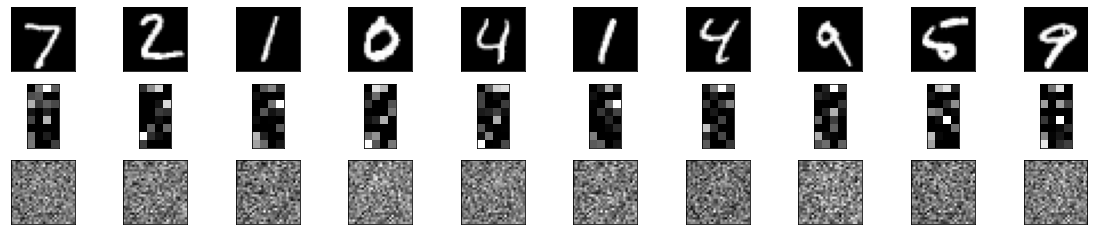

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)
input_img= Input(shape=(784,))
encoded = Dense(units=32, activation='relu')(input_img)
decoded = Dense(units=784, activation='sigmoid')(encoded)
autoencoder=Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_train, X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test, X_test))
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)
plt.figure(figsize=(40, 4))
for i in range(10):
  ax = plt.subplot(3, 20, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(3, 20, i + 1 + 20)
  plt.imshow(encoded_imgs[i].reshape(8,4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(3, 20, 2*20 +i+ 1)
  plt.imshow(predicted[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)